In [535]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression

In [536]:
df = pd.DataFrame(columns=['X1', 'X2', 'y'], data=[
    [1,16,9],
    [4,36,16],
    [1,16,9],
    [2,9,8],
    [3,36,15],
    [2,49,16],
    [4,25,14],
    [5,36,17]
])

# y = X1 + 2 * sqrt(X2)

In [537]:
df

,X1,X2,y
0,1,16,9
1,4,36,16
2,1,16,9
3,2,9,8
4,3,36,15
5,2,49,16
6,4,25,14
7,5,36,17


In [538]:
df.shape

(8, 3)

In [539]:
train = df.iloc[:6]
test = df.iloc[6:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y

In [540]:
# Checking if linear regression is able to predict it:
lin_reg = LinearRegression()
fit1 = lin_reg.fit(train_X, train_y)
pred = fit1.predict(test_X)
print(f"\n{pred}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, pred))}\n")


[13.72113586 16.93334467]
RMSE: 0.20274138822160603



In [541]:
# Converting column X2 to sqrtX2 so that model becomes linear, X1 + X2 = y

train_X.X2 = np.sqrt(train_X.X2) * 2
test_X.X2 = np.sqrt(test_X.X2) * 2
print(test_X.X2)

6    10.0
7    12.0
Name: X2, dtype: float64


In [542]:
lin_reg2 = LinearRegression()
lin_reg2 = lin_reg2.fit(train_X, train_y)
pred = lin_reg2.predict(test_X)
print(f"Pred -> {pred}")
print('-' * 40)
print(f"RMSE : {np.sqrt(mean_squared_error(test_y, pred))}")

Pred -> [14. 17.]
----------------------------------------
RMSE : 0.0


In [543]:
# We get much better prediction on truly linear model.
# So just a little data transformation by replacing values with their square root we can get perfect prediction
# Thus the idea behind data transformation and pipelines.

In [544]:
train = df.iloc[:6]
test = df.iloc[6:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y

In [545]:
# Now doing the same procedure with a pipeline.
# A pipline is just a number of steps done one after another.

In [546]:
print('Creating a pipeline for linear regression.')
pipe1 = Pipeline(steps=[('linear_regression', LinearRegression())])
print('Fitting the pipeline.')
pipe1.fit(train_X, train_y)
print('Predicting via pipeline.')
pred = pipe1.predict(test_X)
print(f"{pred}")
print('-' * 40)
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, pred))}")

Creating a pipeline for linear regression.
Fitting the pipeline.
Predicting via pipeline.
[13.72113586 16.93334467]
----------------------------------------
RMSE: 0.20274138822160603


In [547]:
# Now doing Data Transformation with pipelines.
# Creating an experimental transformer.

class ExperimentalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('__init__() called')

    def fit(self, X, y=None):
        print('fit() called.')
        return self

    def transform(self, X, y=None):
        print('transform() called.')
        X_ = X.copy()   # Creating a copy to avoid changes to original dataset.
        X_.X2 = np.sqrt(X_.X2) * 2
        return X_

In [548]:
# After creating a Custom Data Transformer we create the pipeline.

print('Creating pipeline.')
pipe2 = Pipeline(steps=[('Experimental Transformer', ExperimentalTransformer()),
                        ('Linear Regression', LinearRegression())
                        ])
print('Fitting the pipeline.')
pipe2.fit(train_X, train_y)
print('Predicting via pipeline.')
pred = pipe2.predict(test_X)
print(f"{pred}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, pred))}")

Creating pipeline.
__init__() called
Fitting the pipeline.
fit() called.
transform() called.
Predicting via pipeline.
transform() called.
[14. 17.]
RMSE: 0.0


In [549]:
# Creating an experimental transformer without hardcoding X2.

class ExperimentalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name):
        print('__init__() called')
        self.feature_name = feature_name

    def fit(self, X, y=None):
        print('fit() called.')
        return self

    def transform(self, X, y=None):
        print('transform() called.')
        X_ = X.copy()   # Creating a copy to avoid changes to original dataset.
        X_[self.feature_name] = np.sqrt(X_[self.feature_name]) * 2
        return X_

In [550]:
# After creating a Custom Data Transformer we create the pipeline.

print('Creating pipeline.')
pipe2 = Pipeline(steps=[('Experimental Transformer', ExperimentalTransformer(feature_name='X2')),
                        ('Linear Regression', LinearRegression())
                        ])
print('Fitting the pipeline.')
pipe2.fit(train_X, train_y)
print('Predicting via pipeline.')
pred = pipe2.predict(test_X)
print(f"{pred}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, pred))}")

Creating pipeline.
__init__() called
Fitting the pipeline.
fit() called.
transform() called.
Predicting via pipeline.
transform() called.
[14. 17.]
RMSE: 0.0


In [551]:
# Let's modify the target feature to square of current values.

df = pd.DataFrame(columns=['X1', 'X2', 'y'], data=[
    [1,16,81],
    [4,36,256],
    [1,16,81],
    [2,9,64],
    [3,36,225],
    [2,49,256],
    [4,25,196],
    [5,36,289]
])

# sqrt(y) = X1 + 2*sqrt(X2)

In [552]:
train = df.iloc[:6]
test = df.iloc[6:]

train_X = train.drop(columns='y', axis=1)
train_y = train.y

test_X = test.drop(columns='y', axis=1)
test_y = test.y

In [553]:
# Creating a pipeline and checking its performance:

print('Creating a pipeline.')
pipe3 = Pipeline(steps=[('linear regression', LinearRegression())])
print('Fitting the values.')
pipe3.fit(train_X, train_y)
print('Predicting the values.')
pred = pipe3.predict(test_X)
print(f"Pred : {pred}")
print(f'RMSE : {np.sqrt(mean_squared_error(test_y, pred))}')

Creating a pipeline.
Fitting the values.
Predicting the values.
Pred : [200.34790002 279.04738423]
RMSE : 7.679804528409077


In [554]:
# Failed with a large margin, because it's not a linear model.

In [555]:
# After using previous Custom Data Transformer we create the pipeline.

print('Creating pipeline.')
pipe2 = Pipeline(steps=[('Experimental Transformer', ExperimentalTransformer(feature_name='X2')),
                        ('Linear Regression', LinearRegression())
                        ])
print('Fitting the pipeline.')
pipe2.fit(train_X, train_y)
print('Predicting via pipeline.')
pred = pipe2.predict(test_X)
print(f"{pred}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, pred))}")

Creating pipeline.
__init__() called
Fitting the pipeline.
fit() called.
transform() called.
Predicting via pipeline.
transform() called.
[207.42690058 280.94152047]
RMSE: 9.887192456534303


In [556]:
# Failed by a large margin even after transform.

In [557]:
# So what we'll do here is transform the target and replace it with sqrt(y).
# Two ways to do it in scikit learn -> i) using functions ii) using transformer of ur own.

In [558]:
''' Doing by functions:
1st function is to transform the y to sqrt of y.( This creates a linear model)

Second is to convert the predicted value to square again.
( This will now result in squared predictions which is our desired o/p)
'''

' Doing by functions:\n1st function is to transform the y to sqrt of y.( This creates a linear model)\n\nSecond is to convert the predicted value to square again.\n( This will now result in squared predictions which is our desired o/p)\n'

In [559]:
# Basically what we are saying is that let the model predict y and we'll do y^2 on our own later

In [560]:
def target_transform(target):
    """Converts y to square root of y for a linear model"""
    print("target_transform() called.")
    target_ = target.copy()
    target_ = np.sqrt(target_)
    return target_

def inverse_target_transform(target):
    print('inverse_target_transform() called.')
    target_ = target.copy()
    target_ = target_ ** 2
    return target_

In [561]:
# You need not change anything for the pipeline of input features.

pipe3 = Pipeline(steps=[('ExperimentalTransformer', ExperimentalTransformer(feature_name='X2')),
                        ('LinearRegression', LinearRegression())
                        ])

# Create a target transformer.
model = TransformedTargetRegressor(regressor=pipe3,
                                   func=target_transform,
                                   inverse_func=inverse_target_transform,
                                   check_inverse=False)

print('Fitting the pipe3 model')
model.fit(train_X, train_y)
print('Predicting the values and applying inverse func(square in this case)')
pred = model.predict(test_X)
print(f"predictions: {pred}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, pred))}")

__init__() called
Fitting the pipe3 model
target_transform() called.
__init__() called
fit() called.
transform() called.
Predicting the values and applying inverse func(square in this case)
transform() called.
inverse_target_transform() called.
predictions: [196. 289.]
RMSE: 0.0


In [562]:
# Now transforming the target using custom target transformer.

In [563]:
class CustomTargetTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print("__init__ called.")
    def fit(self,target):
        print('Fit called.')
        return self

    def target_transformer(self, target):
        print('target_transformer() called')
        target_ = target.copy()
        target_ = np.sqrt(target_)
        return target_

    def inverse_transform(self, predictions):
        print('inverse_transform() called.')
        pred_ = predictions.copy()
        pred_ = pred_ ** 2
        return pred_


In [564]:
import numpy as np

In [565]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

In [566]:
import seaborn as sns

In [567]:
import pandas as pd

In [568]:
df = pd.DataFrame(columns=['X', 'y'], data=np.concatenate((X, y), axis=1))
df

,X,y
0,1.491070,9.067549
1,0.717530,6.603210
2,1.724031,9.665483
3,0.321546,5.866574
4,0.000066,4.511075
...,...,...
95,1.790563,10.122389
96,1.148399,7.463948
97,0.099590,4.350839
98,1.010632,7.143066


In [569]:
import matplotlib.pyplot as plt

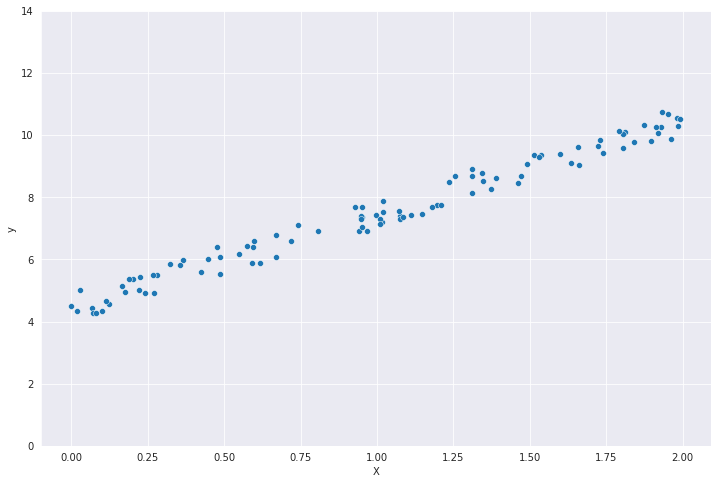

In [570]:
sns.scatterplot(data=df, x='X', y='y')
plt.gcf().set_size_inches((12,8))
plt.ylim((0,14))
plt.show()

In [571]:
df['bias'] = 1.0

In [572]:
df.head()

,X,y,bias
0,1.491070,9.067549,1.0
1,0.717530,6.603210,1.0
2,1.724031,9.665483,1.0
3,0.321546,5.866574,1.0
4,0.000066,4.511075,1.0


In [573]:
features = df.drop('y', axis=1)

In [574]:
features

,X,bias
0,1.491070,1.0
1,0.717530,1.0
2,1.724031,1.0
3,0.321546,1.0
4,0.000066,1.0
...,...,...
95,1.790563,1.0
96,1.148399,1.0
97,0.099590,1.0
98,1.010632,1.0


In [575]:
features = df[['bias', 'X']]

In [576]:
features

,bias,X
0,1.0,1.491070
1,1.0,0.717530
2,1.0,1.724031
3,1.0,0.321546
4,1.0,0.000066
...,...,...
95,1.0,1.790563
96,1.0,1.148399
97,1.0,0.099590
98,1.0,1.010632


In [577]:
X_bias = features.to_numpy()

In [578]:
theta_best = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(df['y'].to_numpy())

In [579]:
theta_best

array([4.45336971, 3.0031873 ])

In [580]:
y_predict = X_bias.dot(theta_best)

In [581]:
y_predict

array([ 8.93133167,  6.60824532,  9.63095743,  5.4190314 ,  4.45356723,
        5.05446245, 10.39985938,  6.23720984,  7.31123519,  7.68272867,
        9.43489052, 10.07710148,  9.35996856,  9.06430933,  4.65784351,
        5.55499908,  6.45934047,  4.5424814 ,  8.22065299,  9.88979749,
       10.43436929,  7.68572065,  7.3007216 ,  6.31100632,  5.88508209,
        8.38956896,  6.4638982 ,  4.66627296,  8.62262532,  8.57918264,
        7.35499498,  4.69730749,  9.67546932,  9.25111256, 10.41427476,
        8.4999062 ,  5.72769922,  4.82393981, 10.34767251,  7.31210696,
        8.38863131,  9.98008369, 10.25132121, 10.19824791,  4.98215903,
        7.71607502,  8.87333829,  6.22909064,  8.84109953,  9.64812901,
        7.51846695,  8.05060961,  7.67603749,  9.87222606,  8.08274792,
        8.15981987,  7.99517516, 10.1493955 ,  7.51426771,  5.1294004 ,
        5.26772435,  5.91213116,  5.91407368,  5.29025105,  7.23688959,
        4.79442086,  6.09919807,  9.87448351,  5.52302363,  5.11

In [582]:
df

,X,y,bias
0,1.491070,9.067549,1.0
1,0.717530,6.603210,1.0
2,1.724031,9.665483,1.0
3,0.321546,5.866574,1.0
4,0.000066,4.511075,1.0
...,...,...,...
95,1.790563,10.122389,1.0
96,1.148399,7.463948,1.0
97,0.099590,4.350839,1.0
98,1.010632,7.143066,1.0


In [583]:
df.drop('bias', axis=1)

,X,y
0,1.491070,9.067549
1,0.717530,6.603210
2,1.724031,9.665483
3,0.321546,5.866574
4,0.000066,4.511075
...,...,...
95,1.790563,10.122389
96,1.148399,7.463948
97,0.099590,4.350839
98,1.010632,7.143066


In [584]:
df['y_pred'] = y_predict

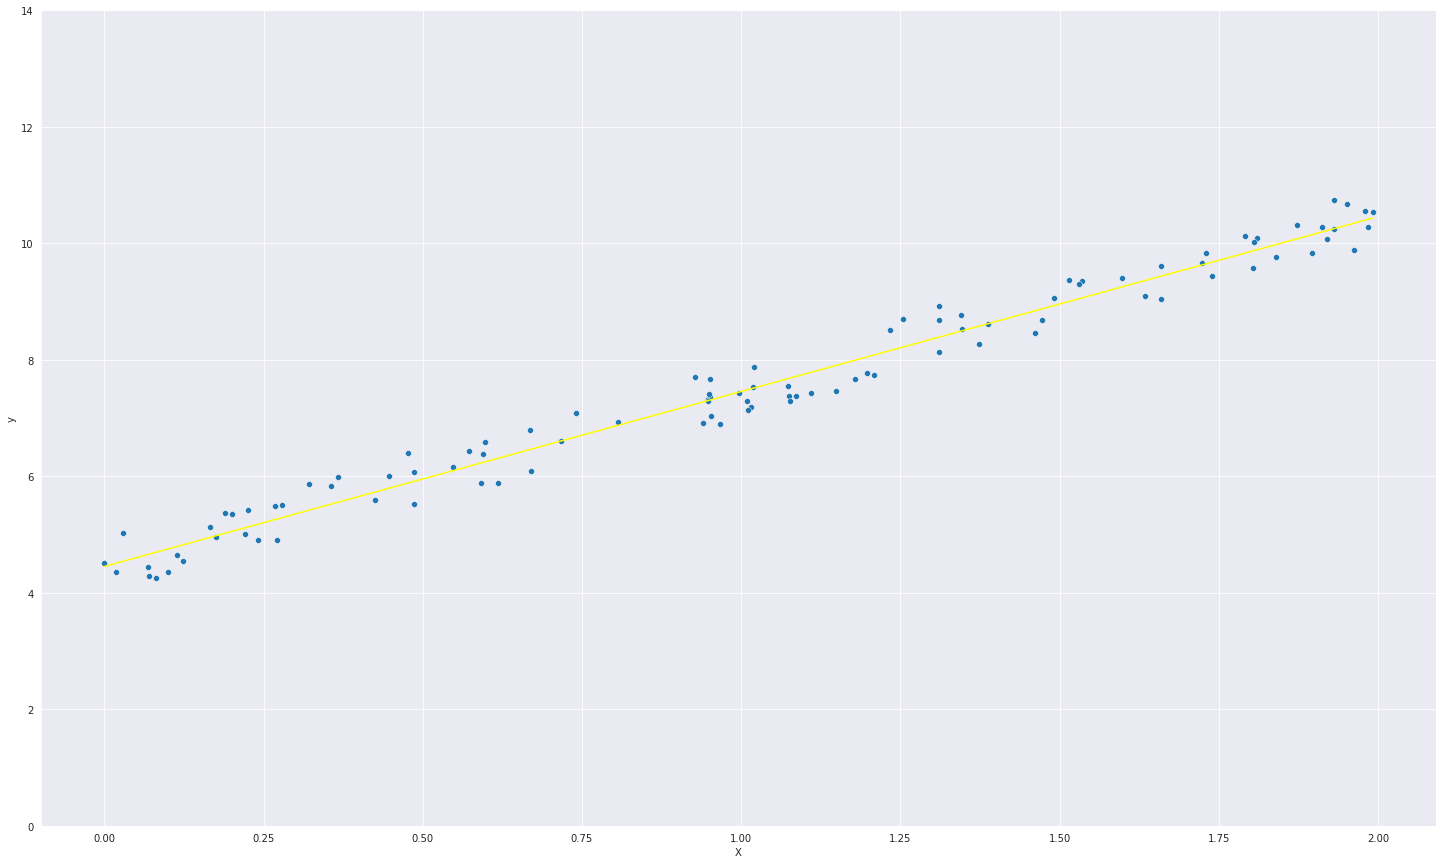

In [585]:

sns.scatterplot(data=df, x='X', y='y')
sns.lineplot(color='yellow',data=df, x='X', y='y_pred')
plt.gcf().set_size_inches((25,15))
plt.ylim((0,14))
plt.show()

In [586]:
# Doing the same using linear regression

In [587]:
from sklearn.linear_model import LinearRegression
li_reg = LinearRegression()

In [588]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

In [589]:
li_reg.fit(X,y)

LinearRegression()

In [590]:
li_reg.intercept_, li_reg.coef_

(array([4.51335808]), array([[2.97941083]]))

In [591]:
predictions = li_reg.predict(X)

In [592]:
df_2 = pd.DataFrame(data=np.concatenate((X, y), axis=1),columns=['X', 'y'])
df_2['predictions_linear_regression'] = predictions

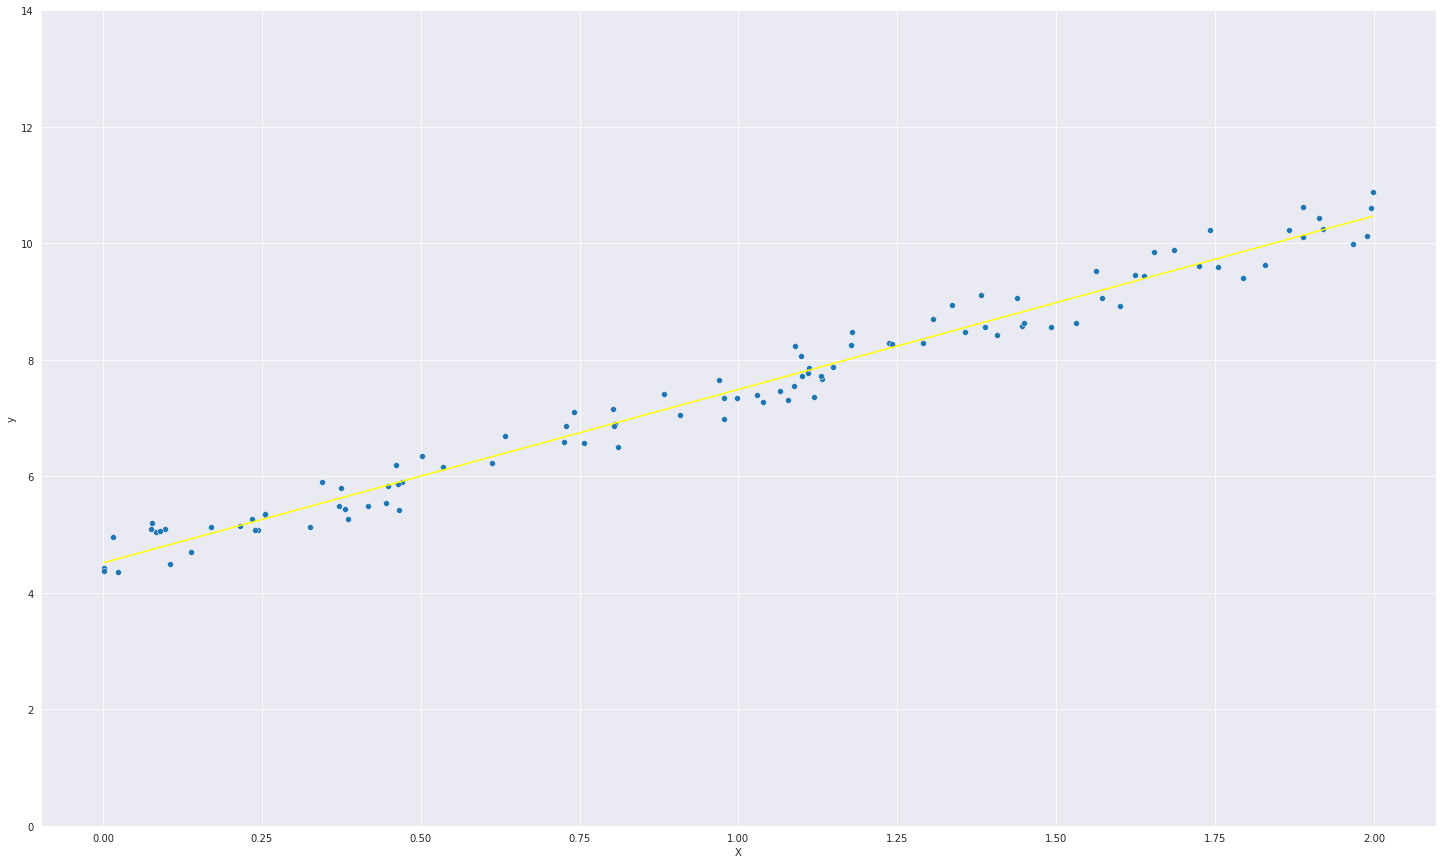

In [593]:
sns.scatterplot(data=df_2, x='X', y='y')
sns.lineplot(data=df_2, x='X', y='predictions_linear_regression', color='yellow')
plt.gcf().set_size_inches((25,15))
plt.ylim((0,14))
plt.show()

In [594]:
df_2

,X,y,predictions_linear_regression
0,1.109827,7.766896,7.819987
1,1.997863,10.888784,10.465813
2,1.829251,9.626329,9.963448
3,1.445786,8.577801,8.820948
4,0.968945,7.654644,7.400244
...,...,...,...
95,0.090227,5.063365,4.782182
96,0.325151,5.124702,5.482117
97,0.015531,4.964401,4.559630
98,0.883240,7.420168,7.144891


In [595]:
df_2['bias'] = 1

In [596]:
df_2

,X,y,predictions_linear_regression,bias
0,1.109827,7.766896,7.819987,1
1,1.997863,10.888784,10.465813,1
2,1.829251,9.626329,9.963448,1
3,1.445786,8.577801,8.820948,1
4,0.968945,7.654644,7.400244,1
...,...,...,...,...
95,0.090227,5.063365,4.782182,1
96,0.325151,5.124702,5.482117,1
97,0.015531,4.964401,4.559630,1
98,0.883240,7.420168,7.144891,1


In [600]:
X_bias = df_2[['bias', 'X']].to_numpy()

In [601]:
X_bias

array([[1.        , 1.10982657],
       [1.        , 1.9978631 ],
       [1.        , 1.82925077],
       [1.        , 1.44578582],
       [1.        , 0.96894507],
       [1.        , 1.09966554],
       [1.        , 0.80560431],
       [1.        , 1.96681015],
       [1.        , 0.0831347 ],
       [1.        , 1.60067245],
       [1.        , 1.4062031 ],
       [1.        , 1.68536093],
       [1.        , 1.62335179],
       [1.        , 0.16933957],
       [1.        , 1.91366047],
       [1.        , 0.47094904],
       [1.        , 0.00228524],
       [1.        , 1.35628314],
       [1.        , 1.33604459],
       [1.        , 0.2151715 ],
       [1.        , 0.00225119],
       [1.        , 0.50136918],
       [1.        , 1.98883737],
       [1.        , 0.41702544],
       [1.        , 0.3721743 ],
       [1.        , 1.88850281],
       [1.        , 1.88844044],
       [1.        , 0.2346754 ],
       [1.        , 0.81038118],
       [1.        , 1.49195462],
       [1.

In [602]:
y = df_2['y']

In [604]:
y

0      7.766896
1     10.888784
2      9.626329
3      8.577801
4      7.654644
        ...    
95     5.063365
96     5.124702
97     4.964401
98     7.420168
99     5.070604
Name: y, Length: 100, dtype: float64

In [605]:
theta_best = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

In [606]:
predictions_normal_eq = X_bias.dot(theta_best)

In [607]:
df_2['predictions_normal_eq'] = predictions_normal_eq

In [608]:
df_2

,X,y,predictions_linear_regression,bias,predictions_normal_eq
0,1.109827,7.766896,7.819987,1,7.819987
1,1.997863,10.888784,10.465813,1,10.465813
2,1.829251,9.626329,9.963448,1,9.963448
3,1.445786,8.577801,8.820948,1,8.820948
4,0.968945,7.654644,7.400244,1,7.400244
...,...,...,...,...,...
95,0.090227,5.063365,4.782182,1,4.782182
96,0.325151,5.124702,5.482117,1,5.482117
97,0.015531,4.964401,4.559630,1,4.559630
98,0.883240,7.420168,7.144891,1,7.144891


In [609]:
df_2['predictions_linear_regression'] == df_2['predictions_normal_eq']

0      True
1     False
2     False
3      True
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [ ]:
# This implies that BEST PARAMETERS of OPTIMIZATION ALGORITHM AND NORMAL EQUATION CAN BE DIFFERENT.